In [4]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images/255.0
test_images = test_images / 255.0

In [6]:
# Define original model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the model
print(f'\nModel Training:')
model.fit(training_images, training_labels, epochs = 5)

# Evaluate on test set
print(f'\nModel Evaluation:')
test_loss = model.evaluate(test_images, test_labels)


Model Training:
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4986 - accuracy: 0.8266
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3759 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3343 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3130 - accuracy: 0.8827
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2938 - accuracy: 0.8919

Model Evaluation:
313/313 [==============================] - 0s 897us/step - loss: 0.3736 - accuracy: 0.8680


# Improve the model with Convolution

In [9]:
# Define new model

model = tf.keras.models.Sequential([
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Print the model summary

model.summary()

# Use same settings

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the model

print(f'\nModel Training')
model.fit(training_images, training_labels, epochs = 5)

# Evaluate on the test set
print(f'Model Evaluation: ')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# Visualizing the Convolutions and Pooling

In [10]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 7ms/step


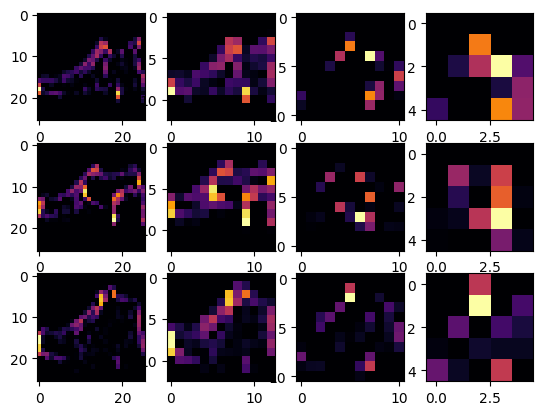

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)